## Importing Dependencies

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

## Loading the dataset

In [7]:
df = pd.read_csv("../data/benin-malanville.csv")

## Summary Statistics & Missing Values

In [8]:
display(df.describe())
missing = df.isna().mean() * 100
print("Columns with >5% missing:\n", missing[missing > 5])

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000


Columns with >5% missing:
 Series([], dtype: float64)


## Outlier Detection & Cleaning

In [10]:
# Strip leading and trailing spaces from column names
df.columns = df.columns.str.strip()

# ...existing code...
for col in ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']:
    df[f'{col}_z'] = zscore(df[col].fillna(df[col].median()))
    outliers = df[np.abs(df[f'{col}_z']) > 3]
    print(f"{col} outliers: {len(outliers)}")

# Impute missing values in key columns
for col in ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']:
    df[col] = df[col].fillna(df[col].median())
# ...existing code...

GHI outliers: 89
DNI outliers: 0
DHI outliers: 3738
ModA outliers: 27
ModB outliers: 63
WS outliers: 3109
WSgust outliers: 3500


## Time Series & Visual Analysis

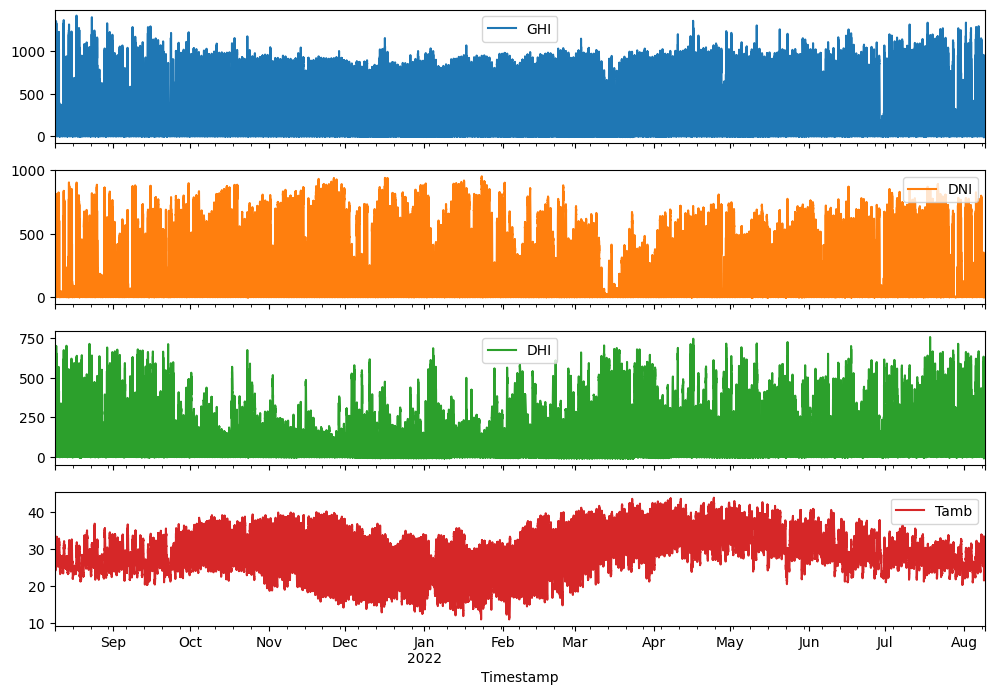

In [11]:
# ...existing code...
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp')[['GHI', 'DNI', 'DHI', 'Tamb']].plot(subplots=True, figsize=(12,8))
plt.show()
# ...existing code...

## Correlation & Relationship Analysis

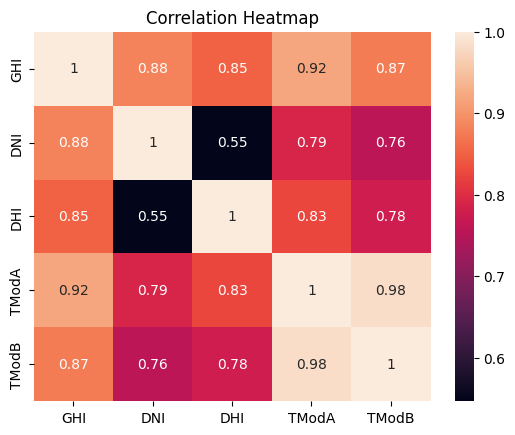

In [12]:
# ...existing code...
sns.heatmap(df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()
# ...existing code...

## Distribution & Wind Analysis

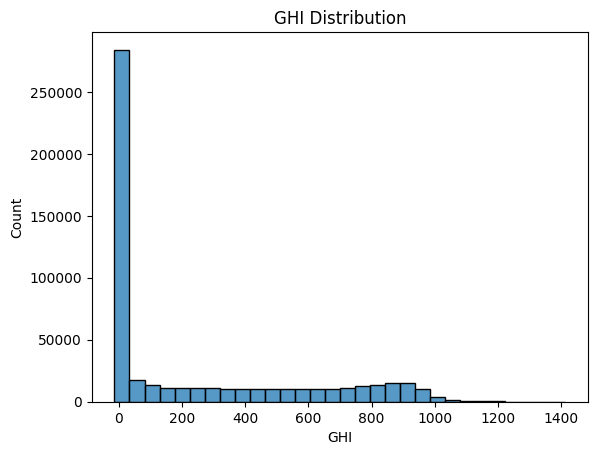

In [13]:
# ...existing code...
sns.histplot(df['GHI'], bins=30)
plt.title('GHI Distribution')
plt.show()
# ...existing code...